# Buneman and weak cold beam instabilities with UPIC-ES

## General dispersion relation

Consider two cold species, which we will generically label species 1 and species 2, each with constant drift velocity $\vec{v}_{0,1}$ and $\vec{v}_{0,2}$ and fluctuating velocity $\tilde{\vec{v}}_1$ and $\tilde{\vec{v}}_2$, respectively. The linearized Navier-Stokes equation for each species is then

$$ \frac{d}{d t} \tilde{\vec{v}}_s = \frac{\partial}{\partial t} \tilde{\vec{v}}_s + \vec{v}_{0,s} \cdot \nabla \tilde{\vec{v}}_s = \frac{q_s}{m_s} \tilde{\vec{E}}. $$

In addition, the continuity equation for each species is

$$ \frac{\partial}{\partial t} \tilde{n}_s + n_{0,s} \nabla \cdot \tilde{\vec{v}}_s + \vec{v}_{0,s} \cdot \nabla \tilde{n}_s = 0. $$

Poisson's equation then yields

$$ \nabla \cdot \tilde{\vec{E}} = 4\pi \sum_{s}q_s \tilde{n}_s. $$

If we assume a plane wave solution of the form $\tilde{\vec{E}} = \vec{E}_0 e^{i(\vec{k} \cdot \vec{r} - \omega t)}$, then the dynamical equation turns into

$$ (-i\omega + i \vec{k} \cdot \vec{v}_{0,s})\tilde{\vec{v}}_s = \frac{q_s}{m_s} \tilde{\vec{E}} \\
\Rightarrow \tilde{\vec{v}}_s = \frac{q_s \tilde{\vec{E}}}{i m_s (-i\omega + i \vec{k} \cdot \vec{v}_{0,s})}. $$

Similarly, the continuity equation can be rewritten as

$$ -i\omega \tilde{n}_s + i n_{0,s} \vec{k} \cdot \tilde{\vec{v}}_s + i \vec{k} \cdot \vec{v}_{0,s} \tilde{n}_s = 0 \\
\Rightarrow \tilde{n}_s = \frac{n_{0,s} \vec{k} \cdot \tilde{\vec{v}}_s}{\omega - \vec{k} \cdot \vec{v}_{0,s}} = \frac{-q_s n_{0,s} \vec{k} \cdot \tilde{\vec{E}}}{i m_s (\omega - \vec{k} \cdot \vec{v}_{0,s})^2}. $$

If we substitute this expression for $\tilde{n}_s$ into Poisson's equation, after rearranging we find that

$$ \left(1 - \sum_s\frac{\omega_{p,s}^2}{(\omega - \vec{k} \cdot \vec{v}_{0,s})^2}\right)i \vec{k} \cdot \tilde{\vec{E}} = 0. $$

Recognizing that $\nabla \cdot \tilde{\vec{D}} = \nabla \cdot (\epsilon \tilde{\vec{E}}) = \epsilon i \vec{k} \cdot \tilde{\vec{E}}$, the term in parenthesis is then our dielectric constant. Setting this equal to zero gives the dispersion relation as

\begin{equation}
1 - \frac{\omega_{p,1}^2}{(\omega - \vec{k} \cdot \vec{v}_{0,1})^2} - \frac{\omega_{p,2}^2}{(\omega - \vec{k} \cdot \vec{v}_{0,2})^2} = 0. 
\end{equation}

This equation can be used for various types of two-stream instabilities, for which the parameters $\omega_{p,s}$ and $\vec{v}_{0,s}$ can be adjusted. Now let us consider the case where the two species are identical with opposite drift velocities of the same magnitude.

## Buneman instability

Consider a stationary background of ions with the electron plasma moving with a constant drift velocity $\vec{v}_0$. This could be produced, for example, by a current-carrying plasma. Then the dispersion relation is reduced to

$$ 
1 = \omega_{pe}^2 \left(\frac{m_e/m_i}{\omega^2} + \frac{1}{(\omega - \vec{k} \cdot \vec{v}_0)^2}\right).
$$ 

This quartic equation can be cast into a simpler form by defining $x \equiv \omega/\omega_{pe}$ and $\alpha \equiv \vec{k} \cdot \vec{v}_0/\omega_{pe}$ to get

$$ 
1 = \frac{m_e/m_i}{x^2} + \frac{1}{(x-\alpha)^2}.
$$ 

#### Parameters

From the above equation, it is seen that the two free parameters in the problem are the ratio of electron to ion mass, $m_e/m_i$, and $\alpha = \vec{k} \cdot \vec{v}_0/\omega_{pe}$, or simply the ratio $\vec{k} \cdot \vec{v}_0/n_0$.

#### Solution to the dispersion relation

If we define the right-hand side of the equation as

$$ 
\chi (x) = \frac{m_e/m_i}{x^2} + \frac{1}{(x-\alpha)^2},
$$ 

then we seek for solutions to $\chi (x) = 1$. In the below figure, we see that two of the roots for $\omega$ are always real, and the other two roots may be real or complex depending on the value of $\alpha$. To find when the $\omega$ roots begin to be complex, we seek to minimize $\chi(x)$. Setting $\frac{m_e}{m_i} \approx \frac{1}{1836}$ and solving $\chi '(x)=0$ yields $x_{min} \approx 0.075\alpha$. Then setting $\chi(x_{min}) \geq 1$ means that to have complex roots we need $\alpha \lesssim 1.12$. 

In [12]:
import buneman_helper
%matplotlib inline

In [1]:
%load_ext autoreload
%autoreload 2

In [4]:
buneman_helper.plot_chi_interactive()

interactive(children=(FloatSlider(value=1.12, description='$\\alpha$', max=1.5, min=0.9, step=0.01), Output())…

If we let $\omega = \omega_R+i \omega_I$, then solving for $\omega_I$ gives the growth rate. The real and imaginary parts of the frequency are shown in the below figure.

<img src="omega_roots.png" align="left">

In [10]:
buneman_helper.plot_growth_interactive()

interactive(children=(BoundedFloatText(value=0.001, description='$m/M$', max=0.1, min=0.001, step=0.001), Outp…

# Simulations with a Particle-in-Cell Code

In this project, you will be simulating plasmas with the electrostatic code UPIC-ES.   The normalization of the code is $\omega_p = 1$, and the grid size $\Delta x = 1$.  Therefore, velocity is measured in units of [$\Delta x \omega_p$].


Each plasma electron is initialized with positions (only in x) such that the density is uniform. The ions are initialized at the same positions but with a larger mass.  Each electron is also initialized with velocities ($v_1$, $v_2$, $v_3$) or momentum ($mv_1$, $mv_2$, $mv_3$) from a Maxwellian in each direction. The particles then begin to move in the self-consistent fields that their charge density produce, from Poisson's law:

\begin{equation}
\nabla^2 \phi = \rho
\end{equation}



You will be looking at plots of the electric field, $\vec{E}$, and the electrostatic potential, $\phi$. 

### The following lines must always be executed before running anything else.

Reminder: Hit Shift+Enter to run a cell, or select the cell and click on the "Run" button in the top menu bar

## Case 1 :  $V_0=3 \Delta x \omega_p$

### Visualize the theory

The dispersion relation for the Buneman instability does not have an analytical solution. The theory curve is produced through root finding, then constructing an interpolation function for later use.  Here we produce the theory curve for our particular simulation, which has a beam velocity of 3 $\Delta x \omega_{pe}$.

Max growth rate is 0.136, occurring at k = 0.52
Instability edge is at k = 0.68


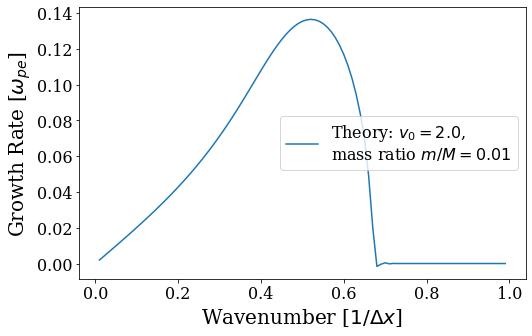

In [114]:
buneman_helper.plot_theory(v0=2.0, mass_ratio=1.0/100.0)

For a mass ratio of 1/100, we have unstable modes for $\alpha \lesssim 1.34$, or $k \lesssim 0.45 \Delta x^{-1}$.  The most unstable mode occurs at $\alpha \approx 1.04$, or $k \approx 0.35 \Delta x^{-1}$.

### Run the simulation:

In [45]:
buneman_helper.run_upic(output_directory='buneman', inputfile='buneman.txt')

run_upic_es completed normally


Run the cell below to look at the x-component of the electric field as a function of time for the various modes in the simulation.

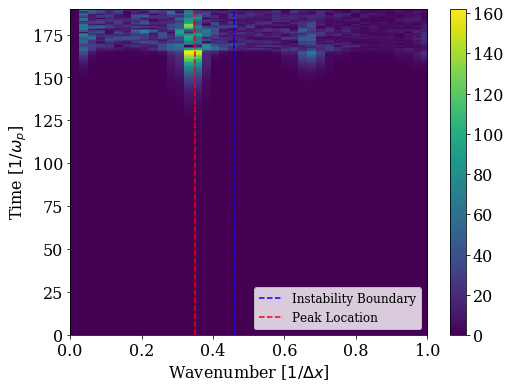

In [111]:
buneman_helper.plot_t_vs_k(output_directory='buneman')

You can observe that the signal occurs near the modes where instability is predicted.   The blue vertical line indicates where the growth rate goes to 0 (at $k \approx 0.45$).  There should be no instability to the right of the plot.  The red vertical line indicates the location of the most unstable mode ($k \approx 0.35$).   

* Do the simulation results agree with theory?
    
* What are the sources of the noise for signals whose wavenumber to the right of the BLUE line?

* Do you recognize any patterns in the mode strengths going from left to right?  What might explain those patterns?

-----
Next we'll look at the mode histories in greater detail, and compare the simulation data against theory.

Plot the electric field modes individually and compare their growth rate to the theoretical growth rate.

The most unstable mode occurs at mode 14, but the theory agrees well for modes 8-14

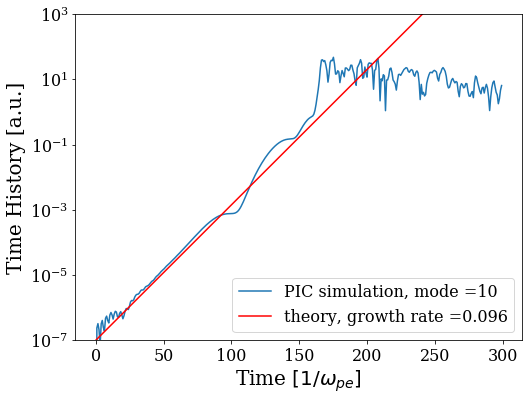

In [112]:
buneman_helper.compare_sim_with_theory(output_directory='buneman', v0=3.0, mode=10, mass_ratio=1.0/100.0)

Plot the evolution of the electrostatic potential in real space.

* Is there a point in time at which the potential ceases to grow?  Do you expect the field to grow without bounds or is there a physical reason for the growth to stop?

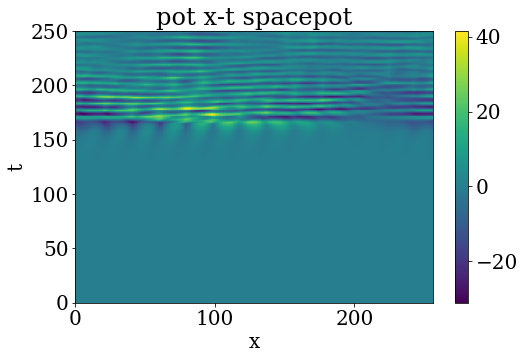

In [72]:
buneman_helper.plot_potential_xt(output_directory='buneman')

Finally, here we visualize the evolution of the electron phase space (x,vx).

* Examine the evolution of the phase space near the time where the potential stops to grow. What is going on at this time in the simulation?

* Think about using the words "linear" and "nonlinear" to describe these phenomena.

In [86]:
buneman_helper.phasespace_movie(output_directory='buneman')

interactive(children=(IntSlider(value=0, description='file_no', max=1480, step=20), Output()), _dom_classes=('…

In [113]:
buneman_helper.buneman_widget()

interactive(children=(Text(value='buneman.txt', description='Template Input File:', layout=Layout(width='55%')…